Weights for  0  degree [0.01930587]
Train Loss for  0  degree 0.7430595999578621
Test loss for  0  degree 0.6780121197862428


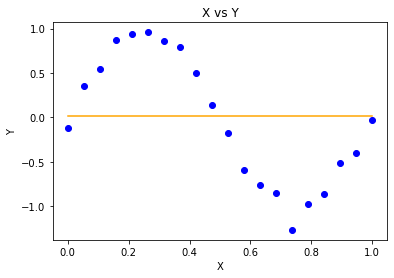

Weights for  1  degree [ 1.05760199 -2.05496108]
Train Loss for  1  degree 0.527203628340909
Test loss for  1  degree 0.5277839920175694


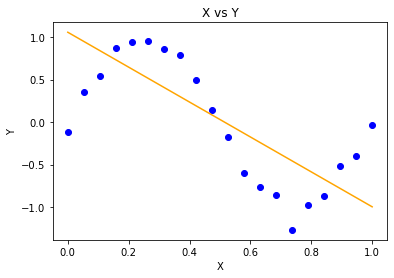

Weights for  2  degree [ 1.26425087 -3.19301749  1.14653193]
Train Loss for  2  degree 0.4957083263285273
Test loss for  2  degree 0.580956779474406


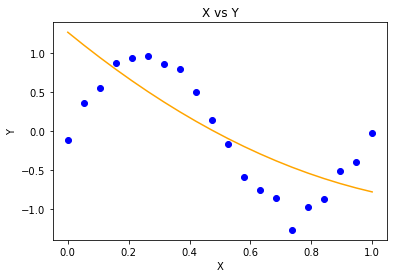

Weights for  3  degree [ 1.51072419 -3.35115904 -1.37628946  2.76993199]
Train Loss for  3  degree 0.42315380000247144
Test loss for  3  degree 0.6490767505143101


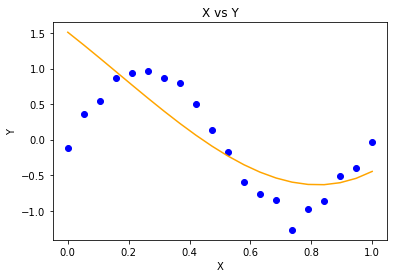

Weights for  4  degree [ 1.49084488 -2.58476973 -2.38923166  0.20551592  3.01498604]
Train Loss for  4  degree 0.36228220921135357
Test loss for  4  degree 0.6306153436422404


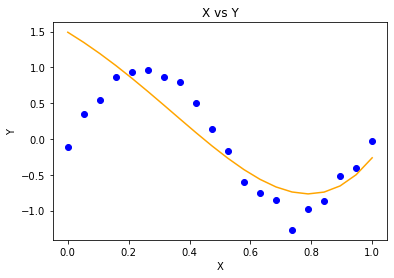

Weights for  5  degree [ 1.38362882 -1.84516426 -2.59012888 -0.98766829  1.04596511  2.82157305]
Train Loss for  5  degree 0.30997267662156897
Test loss for  5  degree 0.5858227959431169


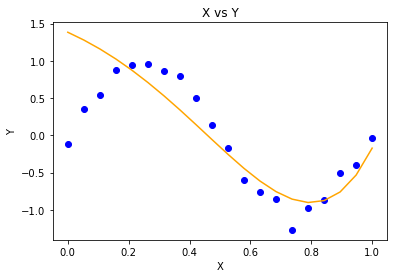

Weights for  6  degree [ 1.28138077 -1.32836295 -2.51814361 -1.50373084  0.02486782  1.41278001
  2.51055234]
Train Loss for  6  degree 0.2685822489659838
Test loss for  6  degree 0.5542942906546886


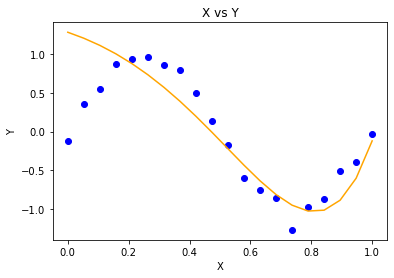

Weights for  7  degree [ 1.20217211 -0.993995   -2.37880893 -1.71200721 -0.51120442  0.61212153
  1.50887661  2.18324942]
Train Loss for  7  degree 0.23868480920128715
Test loss for  7  degree 0.5446226094267873


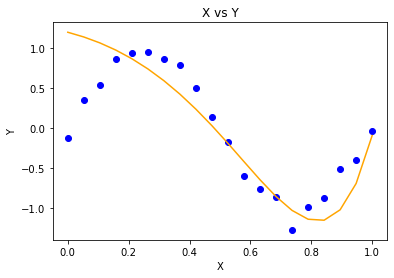

Weights for  8  degree [ 1.14424706 -0.78164793 -2.24027278 -1.7818938  -0.79706908  0.14377836
  0.89795657  1.46490787  1.87980648]
Train Loss for  8  degree 0.2185267852975707
Test loss for  8  degree 0.5536621991641184


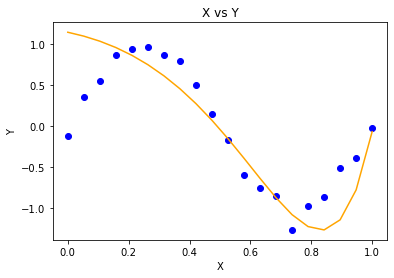

Weights for  9  degree [ 1.10259287 -0.64686618 -2.12188471 -1.79076379 -0.95114279 -0.13822106
  0.5135101   1.00197425  1.3581121   1.61484686]
Train Loss for  9  degree 0.2056026007183075
Test loss for  9  degree 0.5753321381101524


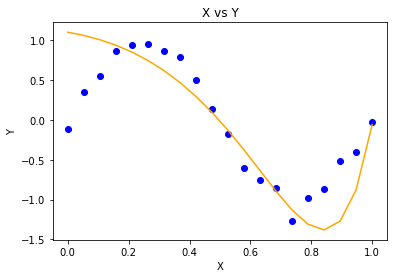

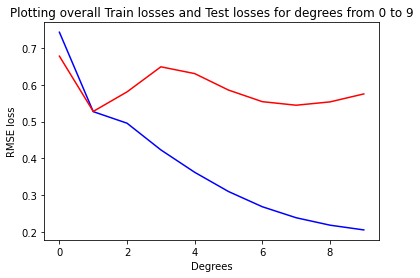

In [17]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
# Univariate Polynomial Regression
 
class PolynomailRegression() :
     
    def __init__( self, degree, learning_rate, iterations ) :
         
        self.degree = degree
         
        self.learning_rate = learning_rate
         
        self.iterations = iterations
    # function to transform X
     
    def transform( self, X ) :
         
        # initialize X_transform
         
        X_transform = np.ones( ( self.m, 1 ) )
         
        j = 0
     
        for j in range( self.degree + 1 ) :
             
            if j != 0 :
                 
                x_pow = np.power( X, j )
                 
                # append x_pow to X_transform
                 
                X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )
 
        return X_transform  
     

   
         
    # model training
     
    def fit( self, X, Y ) :
         
        self.X = X
     
        self.Y = Y
     
        self.m, self.n = self.X.shape
     
        # weight initialization
        self.train_loss=0
        self.W = np.zeros( self.degree + 1 )
         
        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
         
        X_transform = self.transform( self.X )
         
       
                 
        # gradient descent learning
        lossTracker=[]
        loss=0
        for i in range( self.iterations ) :
             
            h = self.predict( self.X )
         
            error = (h - self.Y)
            #print(error)
            
            
            # update weights
         
            self.W = self.W - self.learning_rate * ( 1 / self.m ) * np.dot( X_transform.T, error )
            
        #print(self.W)
        #print(Y)
        
        train_pred=np.dot(X_transform,self.W)
        self.train_loss=math.sqrt(np.mean((train_pred-Y)**2))
        #print("Train loss--",train_loss)
        return self.W,self.train_loss 
     
   
        
        
        
    def predict( self, X ) :
      
        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
        
       # X_transform = self.transform( X )
         
        m, n = X.shape 
        
        X_transform = np.ones( ( m, 1 ) )
        
        j = 0
     
        for j in range( self.degree + 1 ) :
             
            if j != 0 :
                 
                x_pow = np.power( X, j )
                
                # append x_pow to X_transform
                 
                X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )
         
        return np.dot( X_transform, self.W )
       
       
# Driver code    
 
def main() :   
     
    # Create dataset
    n=20
    X = np.sort(np.linspace(0, 1, n))
    N = np.random.normal(0, 1, size=20)
    Y = np.sin(2*np.pi*X)+ N*0.1
    X=X.reshape(-1,1)
    
     
    
    
    X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.5, random_state=42)
    X_train=X_train.reshape(-1,1)
    X_test=X_test.reshape(-1,1)
  
    # model training
    TrainTracker=[]
    TestTracker=[]
    for i in range(10):
        model = PolynomailRegression( degree = i, learning_rate = 0.01, iterations = 30000 )
    
        W,train_loss=model.fit( X_train, Y_train )
        print("Weights for ",i," degree",model.W) 
        print("Train Loss for ",i," degree",model.train_loss)
        # Prediction on training set
        TrainTracker.append(model.train_loss)
        Y_pred = model.predict( X )
   
        # Visualization
    
        y_predic=model.predict(X_test)
        test_error=y_predic-Y_test
        print("Test loss for ",i," degree",math.sqrt(np.mean((test_error)**2)))
        TestTracker.append(math.sqrt(np.mean((test_error)**2)))
        plt.scatter( X, Y, color = 'blue' )
    
  
        plt.plot( X, Y_pred, color = 'orange' )
     
        plt.title( 'X vs Y' )
     
        plt.xlabel( 'X' )
     
        plt.ylabel( 'Y' )
     
        plt.show()
    
    
    plt.plot(TrainTracker, label="train" ,color="blue")
    plt.plot(TestTracker, label="test" ,color="red")
    plt.title( 'Plotting overall Train losses and Test losses for degrees from 0 to 9' )
    plt.xlabel( 'Degrees' )
    plt.ylabel( 'RMSE loss' )
    plt.show()
 
if __name__ == "__main__" :
     
    main()

Weights for  1  penalty [-1.11941293e+74 -1.12139697e+74 -1.12237029e+74 -1.12298537e+74
 -1.12341541e+74 -1.12373550e+74 -1.12398457e+74 -1.12418494e+74
 -1.12435034e+74 -1.12448966e+74]
Train Loss for  1  penalty 4.523778341594079e+74
Test loss for  1  penalty 3.7662977675496653e+74


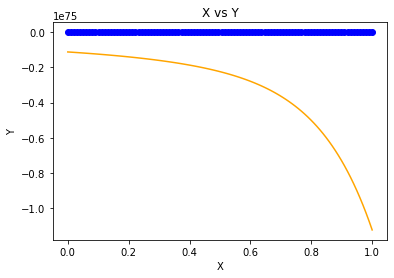

Weights for  0.1  penalty [-3.08151573e+14 -3.13847168e+14 -3.16653119e+14 -3.18430363e+14
 -3.19674955e+14 -3.20602520e+14 -3.21325001e+14 -3.21906687e+14
 -3.22387147e+14 -3.22792065e+14]
Train Loss for  0.1  penalty 1276733730882159.5
Test loss for  0.1  penalty 1061093972349964.4


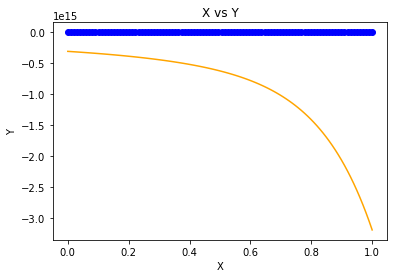

Weights for  0.01  penalty [-0.57163134 -0.83312274 -0.90150247 -0.9269347  -0.93986325 -0.94858108
 -0.95565773 -0.96194913 -0.9677529  -0.97317678]
Train Loss for  0.01  penalty 3.2182608400623267
Test loss for  0.01  penalty 2.661414153575076


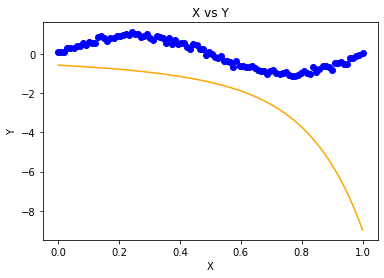

Weights for  0.001  penalty [-0.00436873 -0.12568025 -0.12210642 -0.10097529 -0.08080055 -0.06456185
 -0.052023   -0.04240697 -0.0349948  -0.02922791]
Train Loss for  0.001  penalty 0.6060314928268823
Test loss for  0.001  penalty 0.6510022317077808


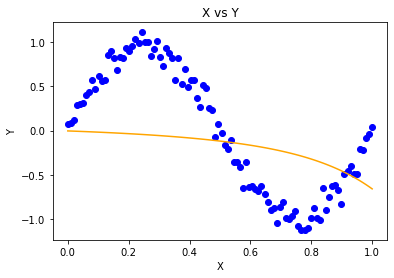

Weights for  0.0001  penalty [ 0.00079816 -0.11750861 -0.11236058 -0.09020023 -0.06928862 -0.05249147
 -0.03951189 -0.02953727 -0.02182643 -0.01580611]
Train Loss for  0.0001  penalty 0.60846033450786
Test loss for  0.0001  penalty 0.6533099503659138


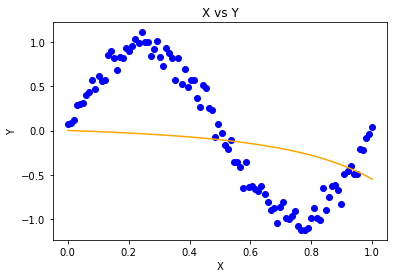

Weights for  1e-05  penalty [ 0.00122616 -0.11681217 -0.11152327 -0.08927075 -0.06829311 -0.0514459
 -0.03842679 -0.02842001 -0.02068238 -0.01463931]
Train Loss for  1e-05  penalty 0.6087949352907283
Test loss for  1e-05  penalty 0.6535907941323106


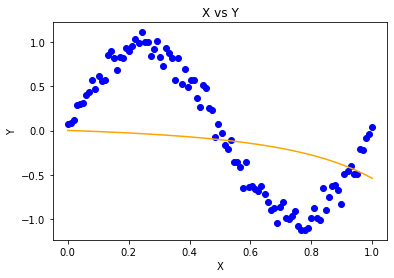

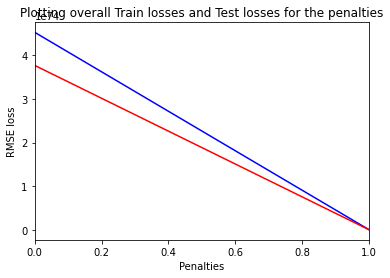

In [19]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
# Univariate Polynomial Regression
 
class PolynomailRegression() :
     
    def __init__( self, degree, learning_rate, iterations, penalty ) :
         
        self.degree = degree
         
        self.learning_rate = learning_rate
         
        self.iterations = iterations
        
        self.penalty=penalty
    # function to transform X
     
    def transform( self, X ) :
         
        # initialize X_transform
         
        X_transform = np.ones( ( self.m, 1 ) )
         
        j = 0
     
        for j in range( self.degree + 1 ) :
             
            if j != 0 :
                 
                x_pow = np.power( X, j )
                 
                # append x_pow to X_transform
                 
                X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )
 
        return X_transform  
     

   
         
    # model training
     
    def fit( self, X, Y ) :
         
        self.X = X
     
        self.Y = Y
     
        self.m, self.n = self.X.shape
     
        # weight initialization
        self.train_loss=0
        self.W = np.zeros( self.degree + 1 )
         
        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
         
        X_transform = self.transform( self.X )
         
       
                 
        # gradient descent learning
        lossTracker=[]
        loss=0
        sumofw=0
        for i in range( self.iterations ) :
             
            h = self.predict( self.X )
            
            error = (h - self.Y)
            #print(error)
            
            
            # update weights
            
            self.W = self.W - (self.learning_rate * ( 1 / self.m ) * np.dot( X_transform.T, error ) + (self.penalty/2)*sum(abs(self.W)) )
            
        #print(self.W)
        #print(Y)
        
        train_pred=np.dot(X_transform,self.W)
        self.train_loss=math.sqrt(np.mean((train_pred-Y)**2))
        #print("Train loss--",train_loss)
        return self.W,self.train_loss 
     
   
        
        
        
    def predict( self, X ) :
      
        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
        
       # X_transform = self.transform( X )
         
        m, n = X.shape 
        
        X_transform = np.ones( ( m, 1 ) )
        
        j = 0
     
        for j in range( self.degree + 1 ) :
             
            if j != 0 :
                 
                x_pow = np.power( X, j )
                
                # append x_pow to X_transform
                 
                X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )
         
        return np.dot( X_transform, self.W )
       
       
# Driver code    
 
def main() :   
     
    # Create dataset
    n=100
    X = np.sort(np.linspace(0, 1, n))
    N = np.random.normal(0, 1, size=100)
    Y = np.sin(2*np.pi*X)+ N*0.1
    X=X.reshape(-1,1)
    
     
    
    
    X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.5, random_state=42)
    X_train=X_train.reshape(-1,1)
    X_test=X_test.reshape(-1,1)
  
    # model training
    TrainTracker=[]
    TestTracker=[]
    penalties=[1,0.1,0.01,0.001,0.0001,0.00001]
    for i in penalties:
        model = PolynomailRegression( degree = 9, learning_rate = 0.01, iterations = 100, penalty=i )
    
        W,train_loss=model.fit( X_train, Y_train )
        print("Weights for ",i," penalty",model.W) 
        print("Train Loss for ",i," penalty",model.train_loss)
        # Prediction on training set
        TrainTracker.append(model.train_loss)
        Y_pred = model.predict( X )
   
        # Visualization
    
        y_predic=model.predict(X_test)
        test_error=y_predic-Y_test
        print("Test loss for ",i," penalty",math.sqrt(np.mean((test_error)**2)))
        TestTracker.append(math.sqrt(np.mean((test_error)**2)))
        plt.scatter( X, Y, color = 'blue' )
    
  
        plt.plot( X, Y_pred, color = 'orange' )
     
        plt.title( 'X vs Y' )
     
        plt.xlabel( 'X' )
     
        plt.ylabel( 'Y' )
     
        plt.show()
    
    
    plt.plot(TrainTracker, label="train" ,color="blue")
    plt.plot(TestTracker, label="test" ,color="red")
    plt.title( 'Plotting overall Train losses and Test losses for the penalties' )
    plt.xlabel( 'Penalties' )
    plt.xlim(0,1)
    plt.ylabel( 'RMSE loss' )
    plt.show()
 
if __name__ == "__main__" :
     
    main()